In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Ana Paulina Olivares Álvarez
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [3]:
def five_point_derivate(f, x, h):

  '''
    Calcula la derivada de cinco puntos para una función en un conjunto de puntos x con paso h

    Parámetros:
    - f: función a derivar.
    - x: array de puntos donde evaluar la derivada.
    - h: paso entre puntos en el array x.

    Retorna:
    - fprime: array de las derivadas aproximadas en cada punto de x.
  '''

  if h == 0:
    raise ValueError('h no puede ser cero')
  n = len(x)
  fprime = np.zeros(n) #array de puros ceros con tamaño = x

  for i in range(n):
    if i == 0:
      fprime[i] = (-25*f(x[i]) + 48*f(x[i] + h) - 36*f(x[i] + 2*h) + 16*f(x[i] + 3*h) - 3*f(x[i] + 4*h)) / (12*h)
    elif i == n-1:
      fprime[i] = (25*f(x[i]) - 48*f(x[i] - h) + 36*f(x[i] - 2*h) - 16*f(x[i] - 3*h) + 3*f(x[i] - 4*h)) / (12*h)
    else:
      fprime[i] = (f(x[i] - 2*h) - 8*f(x[i] - h) + 8*f(x[i] + h) - f(x[i] + 2*h))/ (12*h)

  return fprime

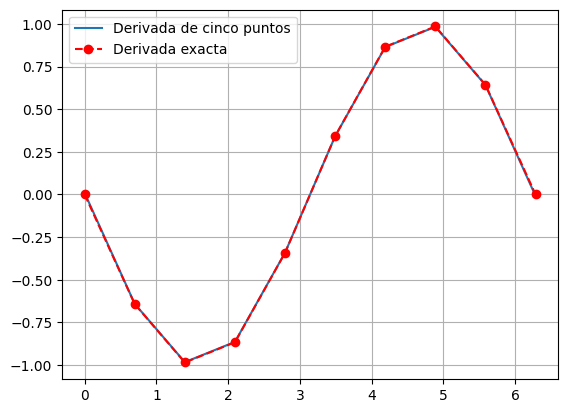

In [4]:
f = lambda x: np.cos(x)
df = lambda x: -np.sin(x)

x = np.linspace(0, 2*np.pi, 10)
h = 0.5

derivada = five_point_derivate(f, x, h)

plt.plot(x, derivada, label = 'Derivada de cinco puntos')
plt.plot(x, df(x), 'ro--', label = 'Derivada exacta')
plt.legend()
plt.grid()
plt.show()

In [12]:
x0 = np.array([np.pi/8])
dx0_exacto = df(x0)

h = (0.5, 0.1, 0.01)

lista = []
lista_error = []

for h_ in h:
  derivada = five_point_derivate(f, x0, h_)
  error = abs(dx0_exacto - derivada)
  lista.append(derivada)
  lista_error.append(error)
  print(f'Derivada para h = {h_}: {derivada}')
  print(f'Derivada exacta con h = {h_}: {df(x0)}')
  print(f'Error para h = {h_}: {error}')

Derivada para h = 0.5: [-0.37138039]
Derivada exacta con h = 0.5: [-0.38268343]
Error para h = 0.5: [0.01130304]
Derivada para h = 0.1: [-0.38267284]
Derivada exacta con h = 0.1: [-0.38268343]
Error para h = 0.1: [1.05960471e-05]
Derivada para h = 0.01: [-0.38268343]
Derivada exacta con h = 0.01: [-0.38268343]
Error para h = 0.01: [7.96070043e-10]


In [13]:
def second_diff(f, x, h):
  '''
  Aproxima la segunda derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso
  return: segunda derivada de f en x
  '''
  return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)

In [14]:
df2 = lambda x: -np.cos(x)
x0 = np.array([np.pi/8])
h = 0.05

derivada_2 = second_diff(f, x0, h)
dx2_exacto = df2(x0)
error = abs(dx2_exacto - derivada_2)

print(f'La segunda derivada aproximada para h = {h} es {derivada_2}')
print(f'La segunda derivada exacta para h = {h} es {df2(x0)}')
print(f'El error es {error}')

La segunda derivada aproximada para h = 0.05 es [-0.92368707]
La segunda derivada exacta para h = 0.05 es [-0.92387953]
El error es [0.00019246]


In [15]:
# disminuyamos el valor de h para verificar su precisión

h = 0.001
derivada_2 = second_diff(f, x0, h)
error = abs(dx2_exacto - derivada_2)

print(f'La segunda derivada aproximada para h = {h} es {derivada_2}')
print(f'El error es {error}')

La segunda derivada aproximada para h = 0.001 es [-0.92387946]
El error es [7.70168505e-08]


In [ ]:
# el error disminuye considerablemente, lo que nos indica que la aproximación mejora con un h menor.

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

In [16]:
def finite_diff(f, x, h):
  '''
  Calcula la primera derivada de f usando las diferencias finitas.
  f: función
  h: paso
  return: primera derivada de f usando las diferencias finitas (función)
  '''
  return (f(x + h) - f(x - h)) / (2*h)

In [18]:
f = lambda x: x*np.exp(x)

x = np.linspace(1.8, 2.2, 6)
y = f(x)
h = 0.1

# Derivadas exactas
df_ex = lambda x: np.exp(x) + x*np.exp(x)
df2_ex = lambda x: 2*np.exp(x) + x*np.exp(x)

x0 = 2
df = finite_diff(f, x0, h)
df2 = second_diff(f, x0, h)

print(f'Primera derivada aproximada: {df}')
print(f'Primera derivada exacta: {df_ex(x0)}')

print(f'Segunda derivada aproximada: {df2}')
print(f'Segunda derivada aproximada: {df2_ex(x0)}')

Primera derivada aproximada: 22.228786880307297
Primera derivada exacta: 22.16716829679195
Segunda derivada aproximada: 29.5931861000076
Segunda derivada aproximada: 29.5562243957226


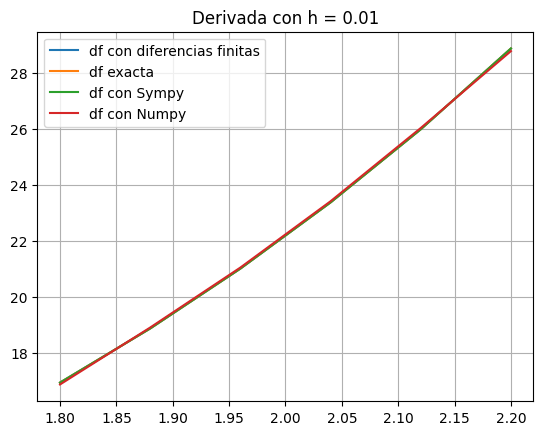

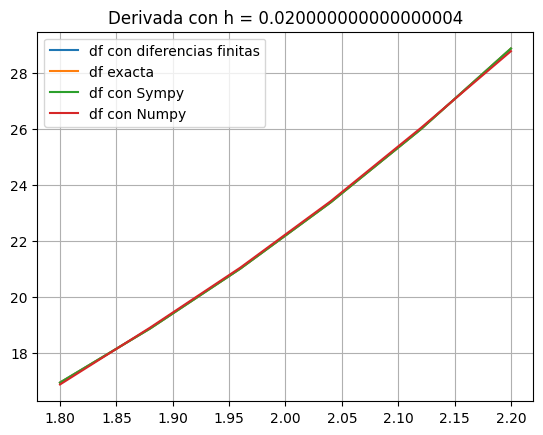

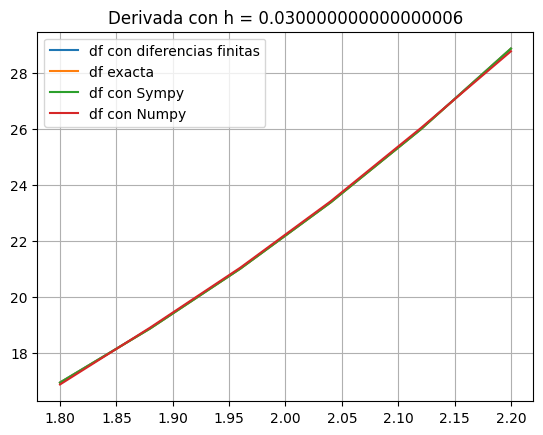

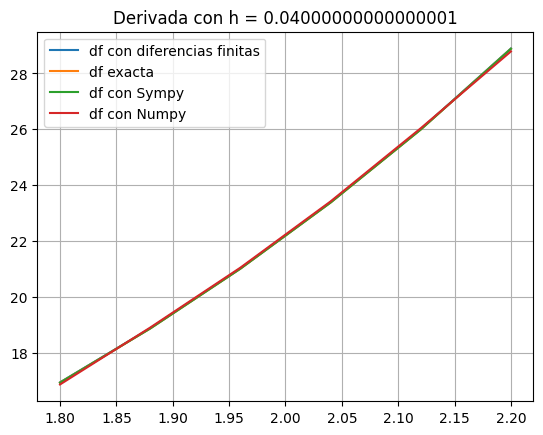

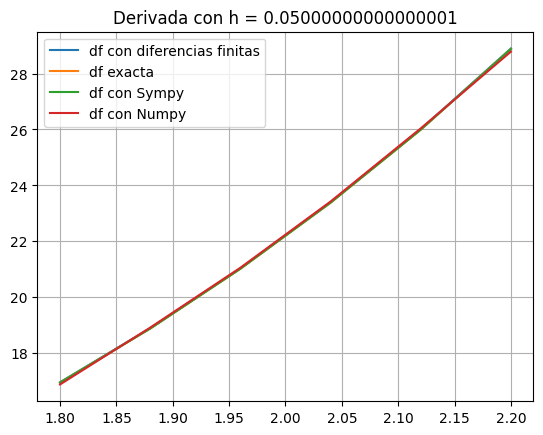

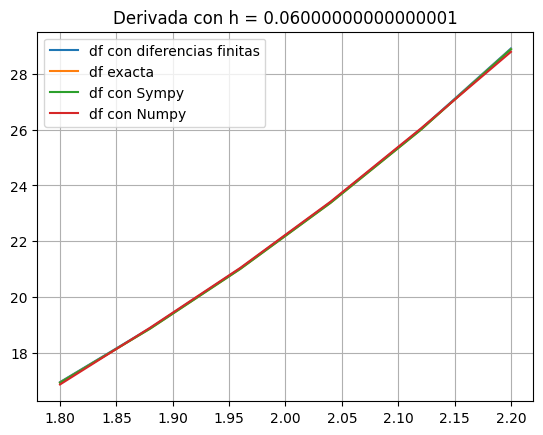

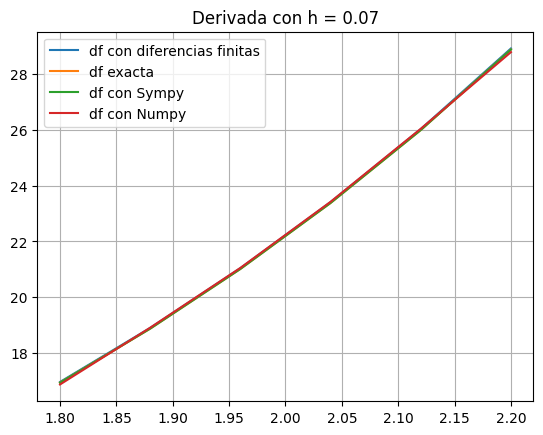

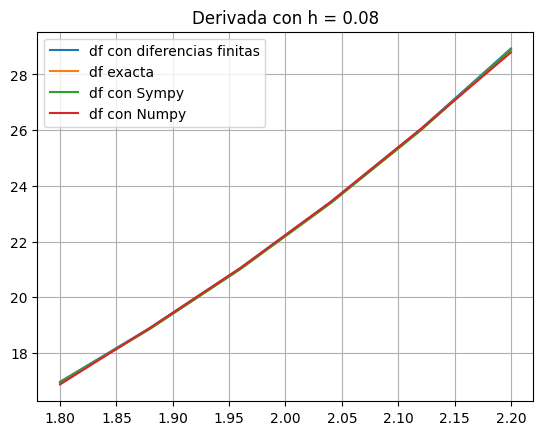

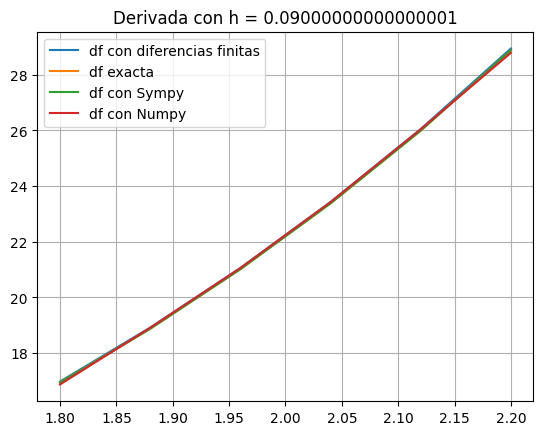

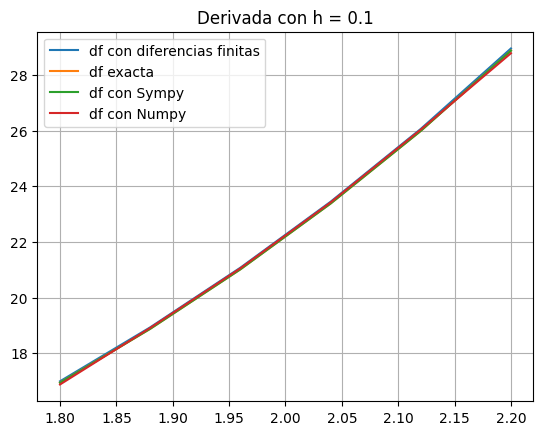

In [52]:
h = np.linspace(0.01, 0.1, 10)

x_sympy = sp.symbols('x')
f_sympy = x_sympy * sp.exp(x_sympy)
df_sympy = sp.diff(f_sympy, x_sympy)
df_sympy = sp.lambdify(x_sympy, df_sympy, 'numpy')

error = []
error_sympy = []
error_numpy = []

for h_ in h:
  derivada = finite_diff(f, x, h_)
  df_sympy = sp.diff(f_sympy, x_sympy)
  df_numpy = np.gradient(y, x, edge_order = 2)

  error.append(np.max(abs(df_ex(x0) - derivada)))
  error_sympy.append(np.max(abs(df_ex(x0) - df_sympy)))
  error_numpy.append(np.max(abs(df_ex(x0) - df_numpy)))

  plt.title(f'Derivada con h = {h_}')
  plt.plot(x, derivada, label = 'df con diferencias finitas')
  plt.plot(x, df_ex(x), label = 'df exacta')
  plt.plot(x, df_sympy_array, label = 'df con Sympy')
  plt.plot(x, df_numpy, label = 'df con Numpy')
  plt.legend()
  plt.grid()
  plt.show()

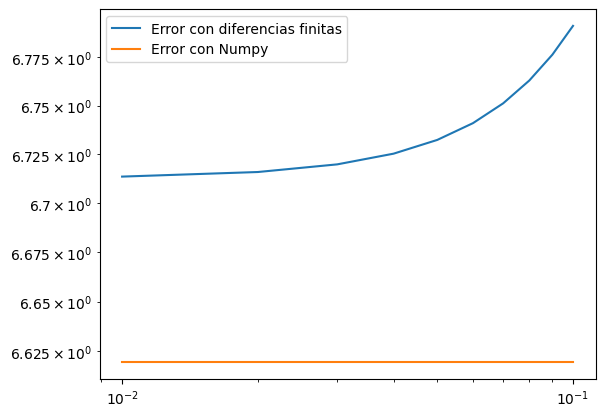

In [57]:
plt.plot(h, error, label = 'Error con diferencias finitas')
plt.plot(h, error_numpy, label = 'Error con Numpy')
plt.semilogx()
plt.semilogy()
plt.legend()
plt.show()

In [56]:
h_optimo = h[np.argmin(error)]
print(f'El valor óptimo de h es {h_optimo}')

El valor óptimo de h es 0.01
